#  <center> <font style="color:rgb(100,109,254)"> Geometric Transformations</font> </center>

You can apply different kinds of image transformations to an image, and we will go thorugh them one by one.

### <font style="color:rgb(134,19,348)"> An overview of Affine Transforms   </font>
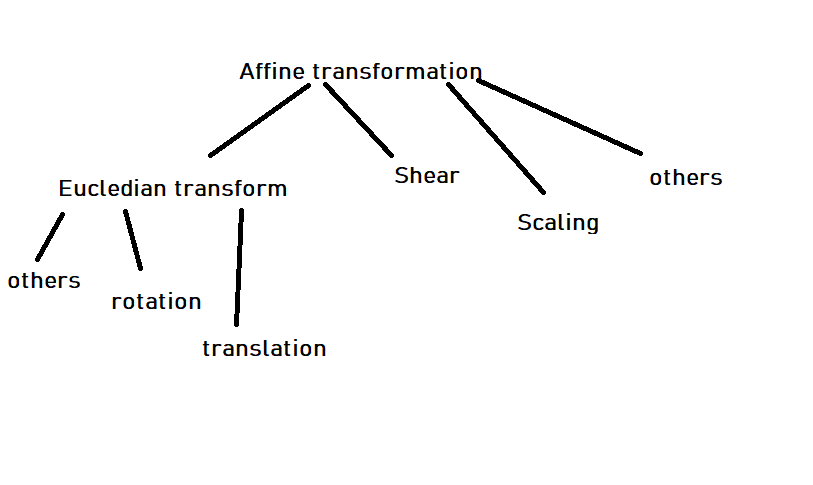

First we will discuss **Affine transformations**, these are are translation, rotation, scaling and shear.

[```dst=cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])```](https://docs.opencv.org/4.2.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983)

- `src`	input image.
- `dst`	output image that has the size dsize and the same type as src .
- `M`	2×3 transformation matrix.
- `dsize`	size of the output image.
- `flags`	combination of interpolation methods and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).
- `borderMode`	pixel extrapolation method (see [BorderTypes](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
- `borderValue`	value used in case of a constant border; by default, it is 0.

Now as mentioned for Affine transformation you pass in a 2x3 Matrix into the function which does the required transformation, the first two 2 columns control, rotation, scale and shear and the last column encodes translation (shift) of image.


$$
A = \begin{bmatrix} a & b & t_x \\ c & d & t_y \end{bmatrix}
$$


So suppose you have an image with each pixel having x,y coordinates, after applying the affine transformation the new x,y coordinates (${x_N}$, ${y_N}$) will be given by the equation.


$$
\begin{bmatrix} x_N \\ y_N \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix}
$$



In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## <font style="color:rgb(134,19,348)">  Scaling  </font>
Lets first just briefly look at scaling, we although have done scaling with `cv2.resize()` but now lets do this at a more fundamental level.

Now remember an image is a matrix, and a matrix after multiplied by an identity matrix remains same.

$$
I = \begin{bmatrix} 1 & 0  \\ 0 & 1  \end{bmatrix}
$$

Now if we are going to be using the wrapaffine function to achieve this than we have to also pass in the translation column too
$$
A = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}
$$

since we are just going to be doing scaling we can set tx,ty to `0`, now we have the following matrix.

$$
A = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}
$$

Now if you use the above matrix you'll get the same image back with no changes. Now lets say you want you want to expand the image in x direction by 150 % and in y by 120 % the you would use a matrix like this:

$$
A = \begin{bmatrix} 1.5 & 0 & 0 \\ 0 & 1.2 & 0 \end{bmatrix}
$$

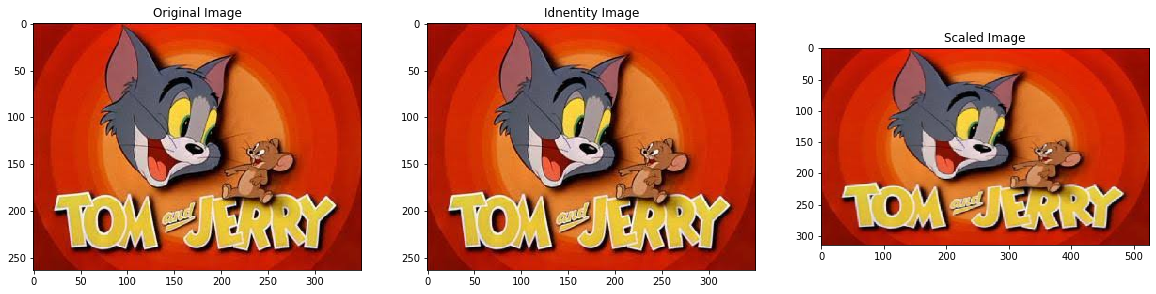

In [9]:
img = cv2.imread('media/M4/tomandjerry.png',1)
rows,cols ,channels = img.shape

# This matrix won't change the image
Modified_identity_matrix = np.float32([
    [1,0, 0],
    [0,1, 0]
])

# This matrix will increase x by 150% and y by 120%.
M = np.float32([
    [1.5,0,0],
    [0,1.2,0]
])

# This won't change the image
Identity = cv2.warpAffine(img,Modified_identity_matrix,(cols,rows))

#  Also expand window accordingly, cols = x , rows = y 
Scaled = cv2.warpAffine(img,M,(int(cols*1.5),int(rows*1.2)))
                    
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(132);plt.imshow(Identity[:,:,::-1]);plt.title("Idnentity Image");
plt.subplot(133);plt.imshow(Scaled[:,:,::-1]);plt.title("Scaled Image");

 ##  <font style="color:rgb(134,19,348)">Translation</font>
Translation is the shifting of object’s location meaning movement of image in x,y direction. <br>
Suppose you want the image to move tx, in x direction and ty in y direction then you construct a transformation accordingly and pass it into the wrapAffine function.


$$
A = \begin{bmatrix} 0 & 1 & t_x \\ 1 & 0 & t_y \end{bmatrix}
$$

When doing the translation rotation and shear params are set to zero and scale is 1, the translation params tx,ty are non zero. 


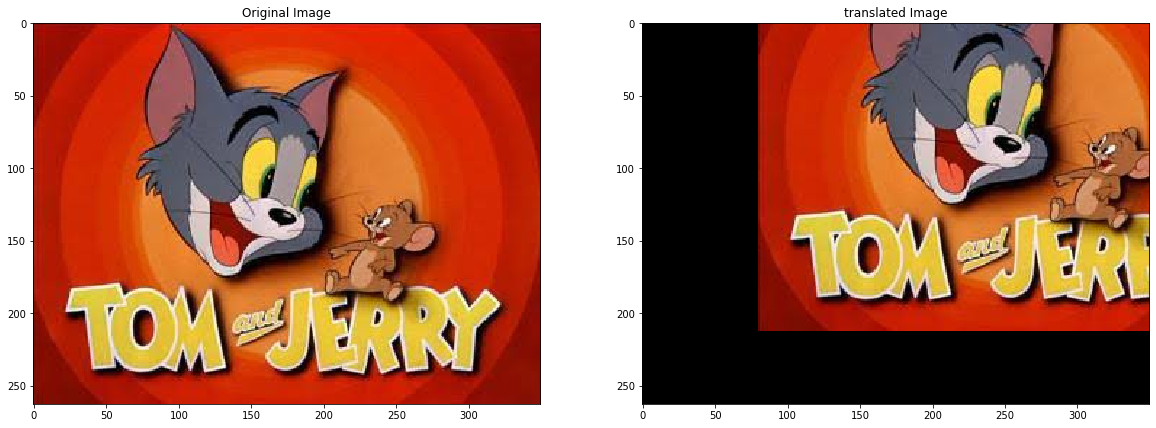

In [6]:
img = cv2.imread('media/M4/tomandjerry.png',1)
rows,cols ,channels = img.shape

# construct the matrix, we're moving 80 px in x direction and -100 px in y direction.
M = np.float32([
    [1,0, 80],
    [0,1, -50]
])

# Apply the affine transformation
translated = cv2.warpAffine(img,M,(cols,rows))

%matplotlib inline
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(translated[:,:,::-1]);plt.title("translated Image");

###  <font style="color:rgb(134,19,348)"> Translation with Scale    </font>
You can also scale the image while translating image, remember to also expand the window accordingly

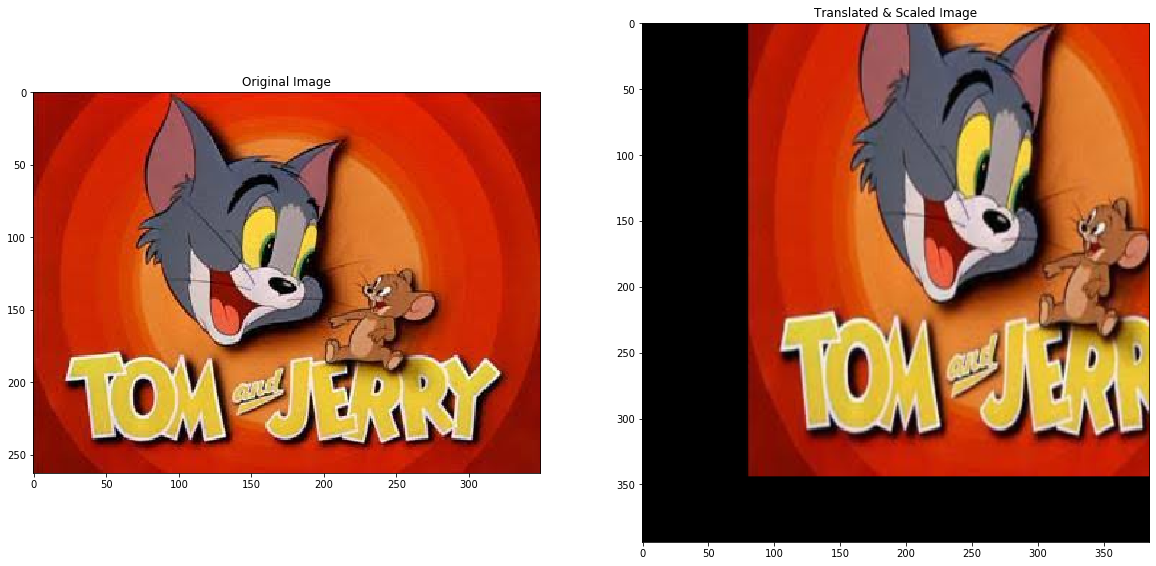

In [7]:
# Lets scale the y by 50% and x by 10%
M = np.float32([
    [1.1,0, 80],
    [0,1.5, -50]
])

#  Also expand window accordingly, cols = x , rows = y 
translated = cv2.warpAffine(img,M,(int(cols*1.1),int(rows*1.5)))

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(translated[:,:,::-1]);plt.title("Translated & Scaled Image");

**Note: Be sure to experiment with different borderModes, see borderTypes [here](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)**

##  <font style="color:rgb(134,19,348)"> Rotation   </font>
Now suppose we want to rotate an image with coordinates $(x, y)$  by an angle $\theta$ from (0,0). The new points become $(x_N, y_N)$ , the equation is given by:

$$
\begin{bmatrix} 
   x_N \\ y_N
\end{bmatrix} = \begin{bmatrix} 
   \cos \theta & \sin \theta \\ 
  -\sin \theta & \cos \theta 
\end{bmatrix} \begin{bmatrix} 
   x \\ y
\end{bmatrix}
$$

Now since the Affine matrix is 2x3 where the 3rd part is for translation, so for `0` translation but rotation of angle $\theta$
the final affine matrix for rotation will be 


$$
A_r =
\begin{bmatrix} 
   \cos \theta & \sin \theta & 0 \\ 
  -\sin \theta & \cos \theta & 0 
\end{bmatrix}
$$

*Note: In opencv doc you will notice the signs of sin$\theta$ is inversed, this just controls clockwise vs anti clockwise rotation.* <br>
Now lets apply the rotation in opencv

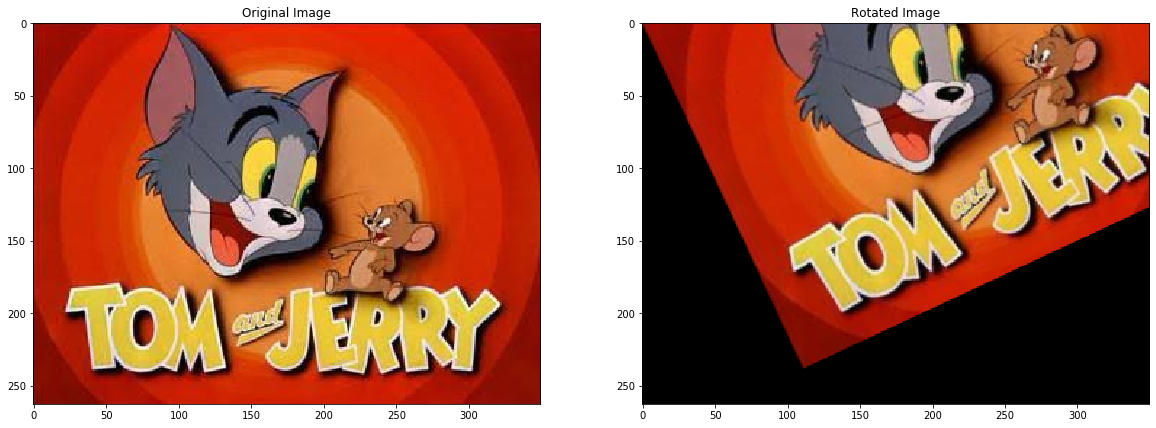

In [10]:
# lets rotate the image by 25 degrees
angle = 25

# We have to convert the angle in radians before we pass it into the numpy function
radian_angle = angle * np.pi / 180.0

# calculate sin and cos theta
sintheta = np.sin(radian_angle)
costheta = np.cos(radian_angle)


rotation_matrix = np.float32(
    [
        [ costheta, sintheta, 0],
        [ -sintheta, costheta, 0]
    ])

# apply the transformation
rotated = cv2.warpAffine(img,rotation_matrix,(cols,rows))

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(rotated[:,:,::-1]);plt.title("Rotated Image");

**Note You can easily also easily perform translation along with rotation in the above example**

## <font style="color:rgb(134,19,348)">  Rotation from Any point  </font>
Now as you see from the above example, rotation origin or center of rotation is (0,0) which is the top left corner, but most of the time you want to perform rotation from the center of image (or any arbitrary point). You can do this by modifying the above matrix.

The final matrix for this is:

Where $custom_x$ and $custom_y$ are custom (x,y) points of rotation, in many cases this is the center of the image.


$$
Matrix =
\begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x\\ 
   y
\end{bmatrix} + \begin{bmatrix} 
   custom_x (1-\cos \theta)  - custom_y \sin \theta\\ 
   custom_x \sin \theta + custom_y ( 1 - \cos \theta)
\end{bmatrix}
$$

In Eucledian transformation the rotation and translation parameters are non-zero,and shear is `0`. <br>
What you have to understand here is that this does not affect rotation but only the translation element is changed here.

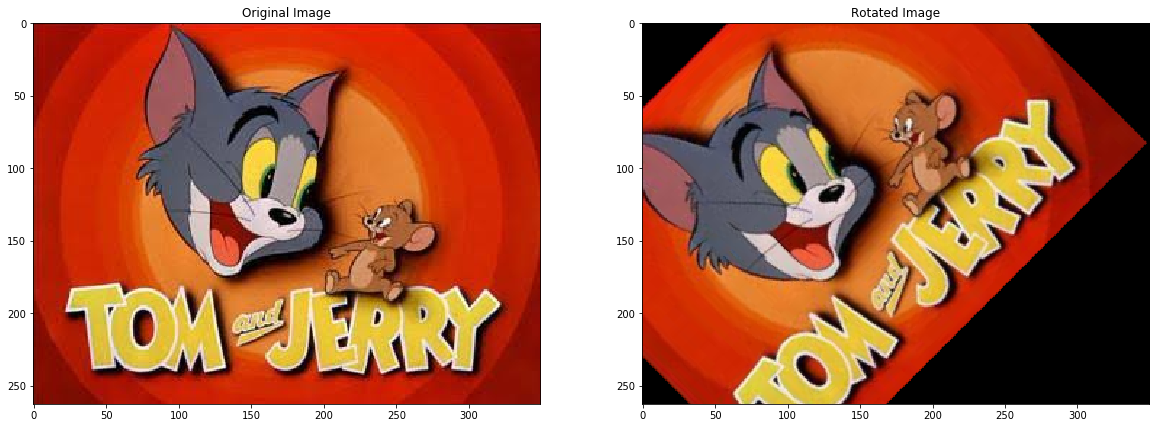

In [11]:
# lets rotate the image by 45 degrees
angle = 45

# We have to convert the angle in radians before we pass it into the numpy function
radian_angle = angle * np.pi / 180.0

sintheta = np.sin(radian_angle)
costheta = np.cos(radian_angle)

# Right now we will rotate the image from the center (you can choose any other point from the image.)
center_x = img.shape[0] / 2
center_y = img.shape[1] / 2

# construct the tx and ty according to the above equation.
tx = (1-costheta) * center_x - sintheta * center_y
ty =  sintheta * center_x  + (1-costheta) * center_y

    
rotation_matrix = np.float32(
    [
        [ costheta, sintheta, tx],
        [ -sintheta,  costheta, ty]
    ])

# apply the transformation
rotated = cv2.warpAffine(img,rotation_matrix,(cols,rows))

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(rotated[:,:,::-1]);plt.title("Rotated Image");

### <font style="color:rgb(134,19,348)">  RotationMatrix2D  </font>
There is an easy way in which you do the above with less code, you need to use rotation matrix 2d function `cv2.getRotationMatrix2D()`, which will construct the required matrix for you and you just need to specify the required params.

We can also use a built in function  to rotate the image about any center. The syntax is given below. 

> **retval	=	cv2.getRotationMatrix2D(	center, angle, scale	)**


- `center:`  Center of the rotation in the source image.
- `angle:`   Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the -top-left corner).
- `scale:`  Isotropic scale factor.


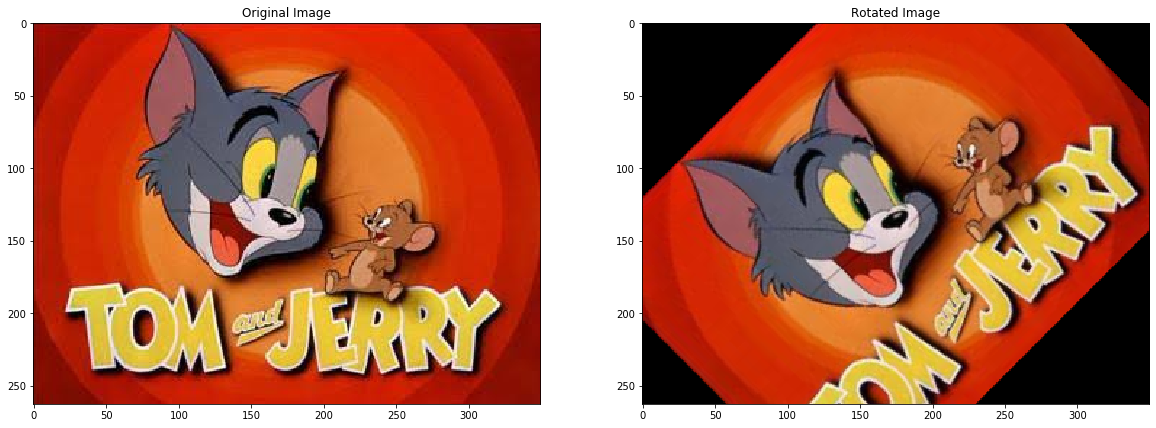

In [12]:
# lets rotate the image by 45 degrees
angle = 45

# Rotating image from center with an angle 45 , at the original scale
rotation_matrix = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)

# apply the transformation
rotated = cv2.warpAffine(img,rotation_matrix,(cols,rows))

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(rotated[:,:,::-1]);plt.title("Rotated Image");

##  <font style="color:rgb(134,19,348)"> Shear</font>
Another Affine transformation is called shear transformation now in this, orthogonality is not preserved because lines that were perpendicular to each other are no longer at 90 degrees to each other although parallel lines in the original image remain parallel in the transformed image. Shear looks like a stretched image

Lets shear the image, with original image scale and zero translation.

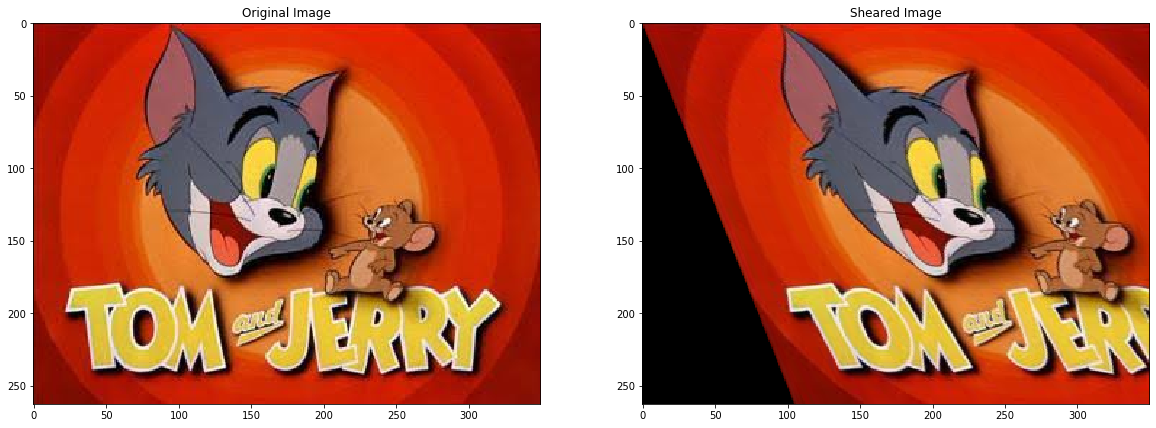

In [13]:
# lets shear the image by 40 
shear = 0.4

shear_matrix = np.float32(
    [
        [ 1, shear, 0],
        [ 0, 1.0  , 0]
    ])
# apply the transformation
shear = cv2.warpAffine(img,shear_matrix,(cols,rows))

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(shear[:,:,::-1]);plt.title("Sheared Image");

Now, if you want to apply all kinds of transformations (scale, translate, rotate, shear)  to an image, you could apply one transformation after the other but its much faster to apply them at once by constructing a single matrix, this can be done by multiplying all non translateable parts and add up all translateable parts and then combining the matrix. Now if you're feeling lazy to code all that then remember we have already covered constructing matrix in which you can do rotation, scaling and translation with a single matrix.

## <font style="color:rgb(134,19,348)">   Estimating Affine Transform of Image </font>

Now the affine transform we have discussed has 6 degrees of freedom 2x3 matrix = 6 variables.

- 2 degrees for translation tx,ty
- 1 degree for in-plane rotation
- 2 degree for scale
- 1 for Shear

Now if you have 3 points of an image, you can recover its affine transformation since (3 points = 6 coordinates), so what you can do here is select 3 points aslo specify there corresponding locations (so 3 new points are formed) and now you can pass in these 2 arrays of 3 points into `cv2.getAffineTransform(src, dst)` function which will return you the required affine transformation for those points to be correctly transformed.


>  	retval = cv2.getAffineTransform( src, dst)

- `src`	Coordinates of quadrangle vertices in the source image.
- `dst`	Coordinates of the corresponding quadrangle vertices in the destination image.

Now lets try this in opencv

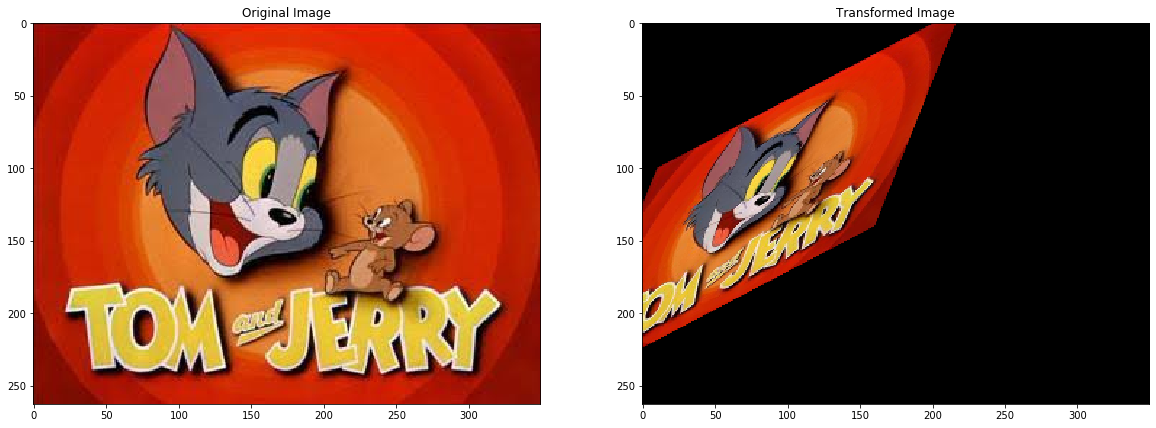

In [14]:
# collect 3 points, these are 3 corners of image top left, top right, bottom right
pts1 = np.float32([[0,0],[cols,0],[0,rows]])       
pts2 = np.float32([[10,100],[220,-10],[-50,250]])     

# calculate the affine transformation matrix given the points
M = cv2.getAffineTransform(pts1,pts2)

# apply the transformation
transformation = cv2.warpAffine(img,M,(cols,rows))

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(img[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(transformation[:,:,::-1]);plt.title("Transformed Image");

## <font style="color:rgb(134,19,348)"> Limitations of Affine Transformation </font>
Now there are some clear limitations of Affine transformation for e.g in affine transformation,  parallel lines will remain parallel, this means you can't transform a square shape to something like a trapezium in which the parallel lines are not parallel. 

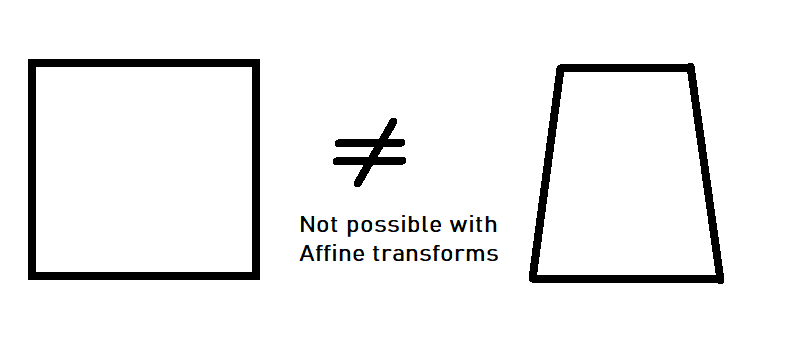

For these we need a more flexible transformation technique like perspective transformation or homgography

##  <font style="color:rgb(134,19,348)">Perspective Transformation </font>
In this transformation you can transform any 4 points to any quadilateral shape, parallel lines are no longer required to remain parallel although straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function `cv2.getPerspectiveTransform()` which returns a 3x3 matrix.

```
	retval = cv2.getPerspectiveTransform( src, dst[, solveMethod] )
```

- `src`	Coordinates of quadrangle vertices in the source image.
- `dst`	Coordinates of the corresponding quadrangle vertices in the destination image.
- `solveMethod`	method used see [DecompTypes](https://docs.opencv.org/4.1.0/d2/de8/group__core__array.html#gaaf9ea5dcc392d5ae04eacb9920b9674c)

Now you can also find this 3x3 matrix can be found by using `cv2.findHomography()` which also finds perspective transform but with a more powerfull approach and is even more robust but for our purposes  `cv2.getPerspectiveTransform()` will get the job done, we will although use cv2.findHomography() in a later tutorial.

After this you should apply `cv2.warpPerspective()` with this 3x3 transformation matrix.

```
 dst	=	cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
```
- `src`	input image.
- `dst`	output image that has the size dsize and the same type as src .
- `M`	3×3 transformation matrix.
- `dsize`	size of the output image.
- `flags`	combination of interpolation methods (INTER_LINEAR or INTER_NEAREST) and the optional flag WARP_INVERSE_MAP, that sets `M` as the inverse transformation ( dst→src ).
- `borderMode`	pixel extrapolation method (BORDER_CONSTANT or BORDER_REPLICATE).
- `borderValue`	value used in case of a constant border; by default, it equals 0.

## <font style="color:rgb(134,19,348)">  Extracting a Book with Perspective Transform  </font>
Now this is one interesting use of perspective transform where you can easily extract a book by defining its 4 corner points.

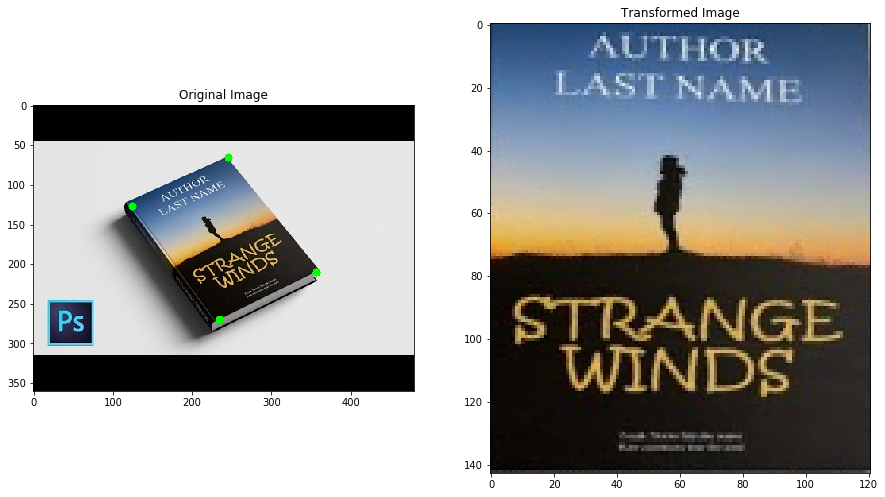

In [15]:
image = cv2.imread('media/M4/sidebook1.jpg',1)
copy = image.copy()

# define the 4 corner points of the book, you can easily find it with % matplotlib notebook 
pts1 = np.float32([[125,127],[246,66],[235,270],[357,210]])

# estimate the width and height of the book from the points
cols2 = abs(pts1[0][0] - pts1[1][0])
rows2 = abs(pts1[0][1] - pts1[2][1])

pts2 = np.float32([[0,0],[cols2,0],[0,rows2],[cols2,rows2]])

# (Optional) Draw the points to show us which points are being transformed
for i,pt in enumerate(pts1):
    cv2.circle(copy,tuple(pt), 5, (0,255,0), -1)

# get the perspective transformation
M = cv2.getPerspectiveTransform(pts1,pts2)

# apply perspective transformation
transformation = cv2.warpPerspective(image,M,(cols2,rows2))

plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(copy[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(transformation[:,:,::-1]);plt.title("Transformed Image");

###  <font style="color:rgb(34,169,134)"> Assignment: Auto Extractor </font>
Now write a python script that pops up a window and lets a user select 4 points and then window closes and delivers the perspective transform of those points, It would be better if you do it with something like extracting a book from an image.

In [ ]:
### ADD CODE HERE



###  <font style="color:rgb(34,169,134)"> Assignment: Sign replacement </font>
Now write a python script that replaces this billboard of cococola with some other picture, like an add of 7Up or any other, remember After the transformation you will also have to blend the transformed image on top of destination image.

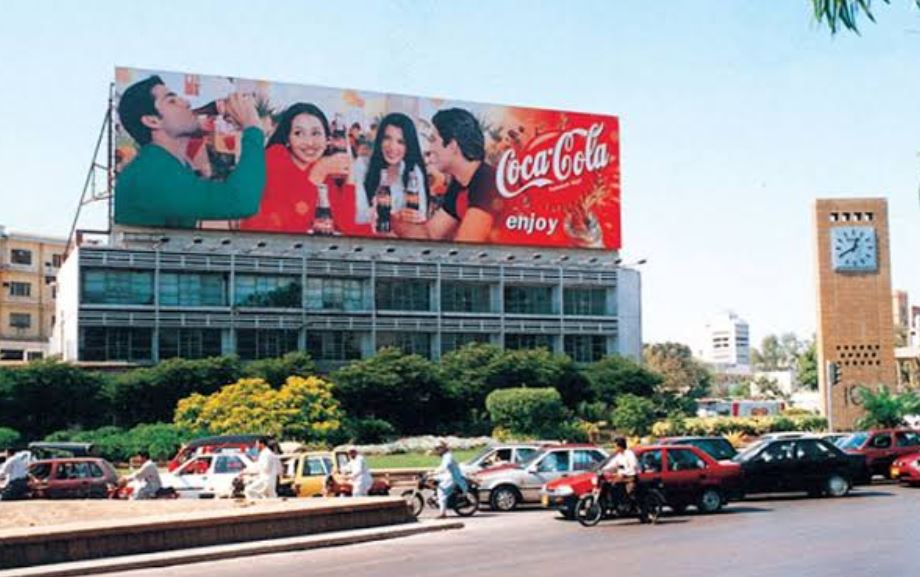

In [ ]:
### ADD CODE HERE



##  <font style="color:rgb(34,169,34)">  Image Cropper  </font>
By using `cv2.selectROI()` you can easily select any ROI of the image this function opens up a window and allows user to select an roi via mouse, and then just press `spacebar` or hit `enter` to close the loop, after getting the roi you can crop it from the image.

[```retval = cv2.selectROI(	windowName, img[, showCrosshair])```](https://docs.opencv.org/4.2.0/d7/dfc/group__highgui.html#ga8daf4730d3adf7035b6de9be4c469af5)

- `windowName`	name of the window where selection process will be shown.
- `img`	image to select a ROI.
- `showCrosshair`	if true crosshair of selection rectangle will be shown.## Image Cropping Application

In [17]:
cap = cv2.VideoCapture('media/M4/carsvid.wmv')

while(1):  
    
    ret, frame = cap.read()
    if not ret:
        break
        
    cv2.imshow('image1',frame)    
    k = cv2.waitKey(5)
    if k & 0xFF == 27:
        break
     
    # select roi when user presses c
    elif k == ord("c"):
            # cv2.selectROI gives cols, rows, width and height in this order
            r = cv2.selectROI(frame)     
            
            # after getting the roi, extract it from the image by using the right fromat i.e. y:y+h, x:x+w
            cropped =  frame[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]
            
            # show the cropped image and save the image in disk
            cv2.imshow('image',cropped)
            cv2.imwrite('media/M4/croppedimage.jpg', cropped)


cap.release()
cv2.destroyAllWindows()  